

*   *Họ và tên: Hồ Công Lượng*
*   *MSSV: 19120572*



# Tìm hiểu & giải thích các tham số trong mô hình SARIMA

##  SARIMA(p,d,q)(P,D,Q)m
*  p: Trend autoregression order.
*  d: Trend difference order.
*  q: Trend moving average order.
*  P: Seasonal autoregressive order.
*  D: Seasonal difference order.
*  Q: Seasonal moving average order.
*  m: The number of time steps for a single seasonal period.

Trong đó:
  + Các p,d,q là thành phần non-seasonal của mô hình, có ý nghĩa như trong mô hình ARIMA.
  + Còn P,D,Q,m là thành phần seasonal của mô hình, (P,D,Q) có thể được suy ra từ các đồ thị ACF, PACF của dữ liệu.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Value')

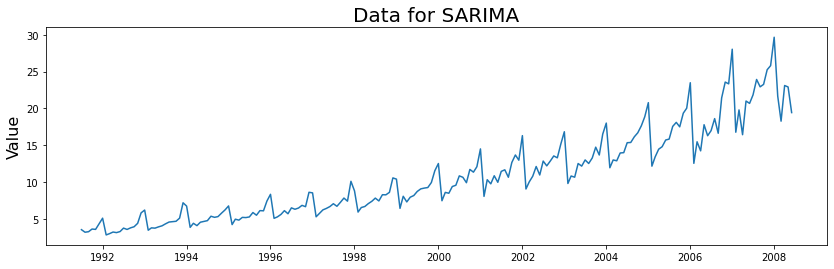

In [1]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

#read data
df = pd.read_csv('a10.csv', parse_dates=[0], index_col=0)

#plot
plt.figure(figsize=(14,4))
plt.plot(df)
plt.title('Data for SARIMA', fontsize=20)
plt.ylabel('Value', fontsize=16)

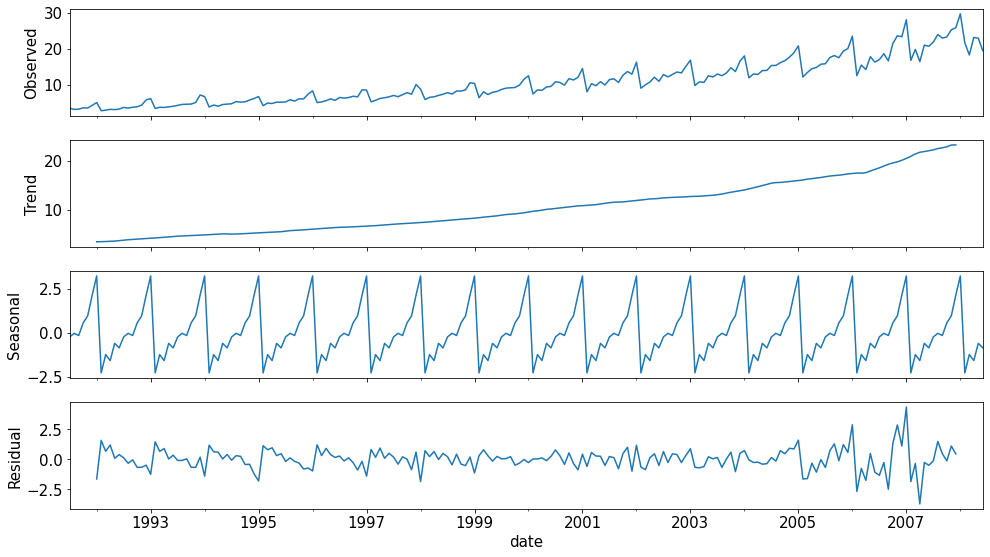

In [2]:
# STL decomposition

plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df,model='additive')
fig = result.plot()

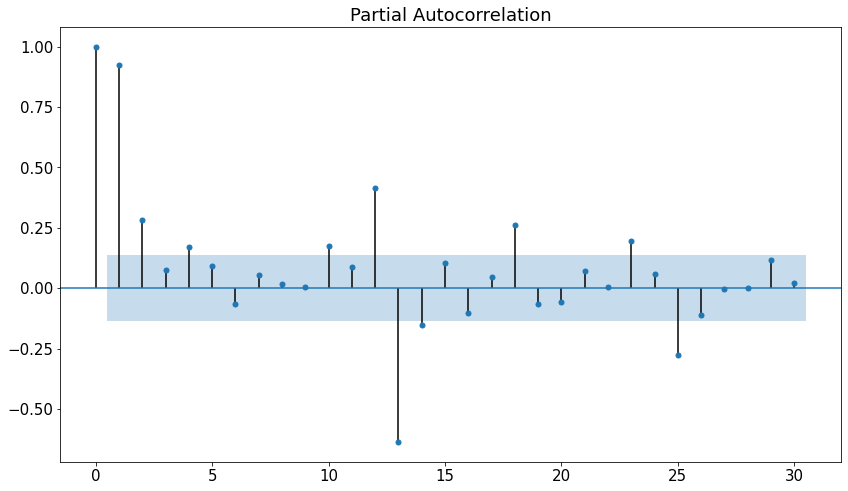

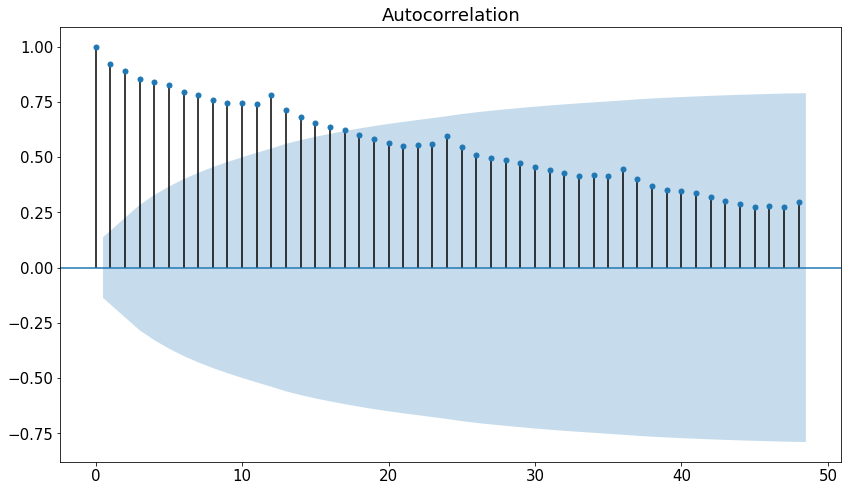

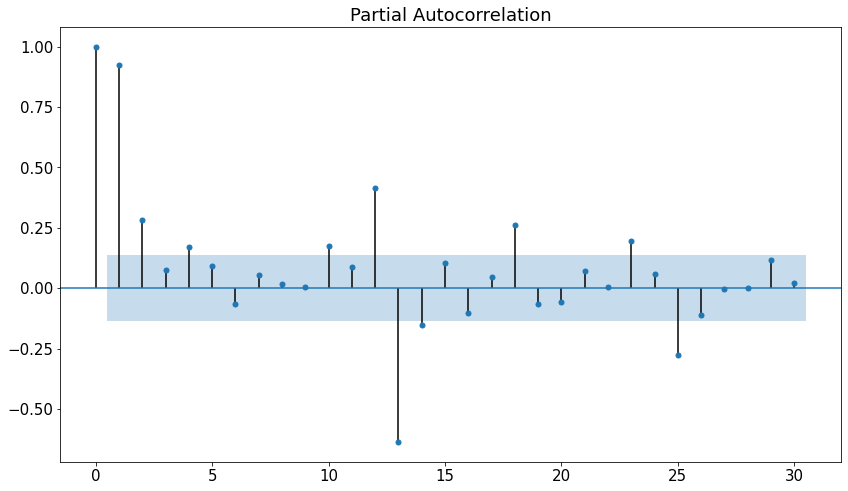

In [3]:
# ACF and PACF plots

plot_acf(df['value'], lags=48);
plot_pacf(df['value'], lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


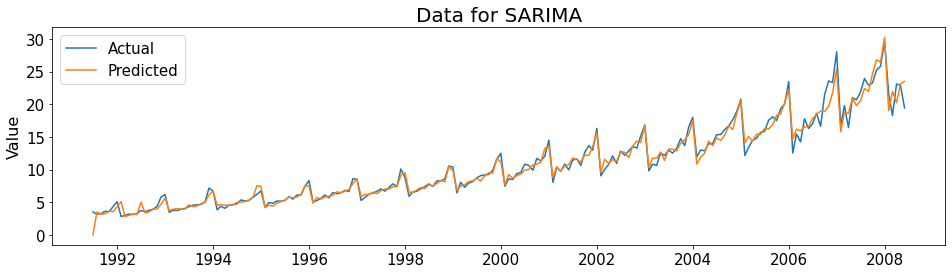

In [4]:
# Fitting SARIMA
sarima = SARIMAX(df['value'], 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

# Visualizing the result
plt.figure(figsize=(16,4))
plt.plot(df, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Data for SARIMA', fontsize=20)
plt.ylabel('Value', fontsize=16)
plt.legend()